<a href="https://colab.research.google.com/github/ishakafatnani/LinearRegression-task1/blob/main/LinearRegression_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **GRIP : The Sparks Foundation**
### **Data Science and Business Analytics Intern**
### **Prepared By : Ishaka Fatnani**
### **Task 1 : Prediction using Supervised ML**
**In this task we have to predict the percentage score of a student based on number of hours studied. The task has two variables where the feature is the number of hours studied and target value is the percentage score. This can be solved using simple line regression.**


##***Importing Libraries***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


##***Loading the dataset***

In [ ]:
data_df = pd.read_csv("http://bit.ly/w-data")
data_df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
data_df.shape

(25, 2)

**This means that there are 25 rows and 2 columns in the dataset.**

##***Data Exploration***

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**There is no null value in the dataset.**

##***Data Visualization***

**Here, we plot our data points on 2-D graph to visualize our dataset and see if we can manually find any relationship between the data.**

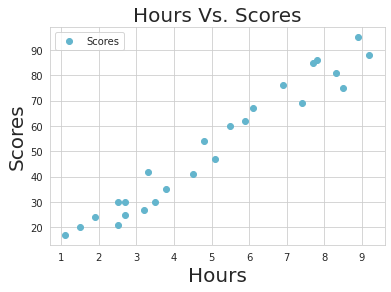

In [ ]:
sns.set_style('whitegrid')
plt.plot(data_df['Hours'],data_df['Scores'],'oc')
plt.xlabel('Hours',fontsize = 20)
plt.ylabel('Scores',fontsize = 20)
plt.title('Hours Vs. Scores',fontsize = 20)
plt.legend(['Scores']);

**From the graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

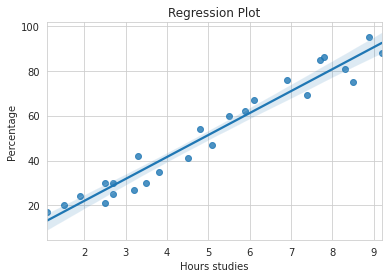

In [ ]:
sns.regplot(x = data_df['Hours'], y = data_df['Scores'])
plt.title('Regression Plot')
plt.xlabel('Hours studies')
plt.ylabel('Percentage');

**From the above regression plot it is confirmed that the parameters are positively correlated.**



##***Splitting the dataset***

In [ ]:
X = data_df.iloc[:,:-1].values
y = data_df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((18, 1), (7, 1))

**Here, we can see that 80% of the data is used for training and the rest 20% is used for testing.**

##***Training the Model***

**We will use the 80% of the training data to train the model.**

In [ ]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

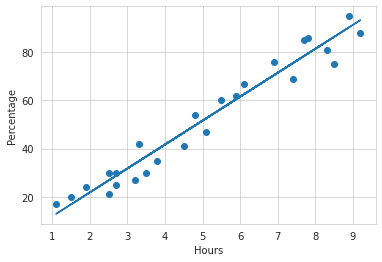

In [ ]:
line = lg.coef_ * X + lg.intercept_
plt.scatter(data_df['Hours'],data_df['Scores'])
plt.plot(X,line)
plt.xlabel('Hours')
plt.ylabel('Percentage');

##***Making Prediction***

**Now, we will test our algorithm with the rest 20% of the data that we have splitted and make predictions.**

In [ ]:
y_pred = lg.predict(X_test).round()
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test] ,'Predicted Scores':[y for y in y_pred]})
prediction

,Hours,Predicted Scores
0,1.5,17.0
1,3.2,34.0
2,7.4,76.0
3,2.5,27.0
4,5.9,61.0
5,3.8,40.0
6,1.9,21.0


###***Compairing Actual Score Vs. Predicted Score***

In [ ]:
predi = pd.DataFrame({'Actual Score': Y_test, 'Predicted Score%':y_pred})
predi

,Actual Score,Predicted Score%
0,20,17.0
1,27,34.0
2,69,76.0
3,30,27.0
4,62,61.0
5,35,40.0
6,24,21.0


###***What will be predicted score if a student studies for 9.25 hrs/ day?***

In [ ]:
hours = np.array([[9.25]])
predi = lg.predict(hours)
print('No. of hours = {}'.format(hours[0][0]))
print('Predicted Score = %.2f'%predi)

No. of hours = 9.25
Predicted Score = 93.89


**So, according to the regression model if a student studies for 9.25 hours a day, he/she is likely to score 93.89 marks(percentage).**

##***Evaluating the Model***

In [ ]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error = %.2f'%mean_absolute_error(Y_test,y_pred))

Mean absolute error = 4.14


**Lower the value of mean absolute error, states that the chances of error or wrong forecasting through the model are very less.**